# Experiment 5: Aleatory Linear and Circle

This experiment explores the differences between Linear and Circle CBNs, focus on attractor fields differences.
For the analysis, we generate a local network template and use it in every local network of the Linear and Circle CBNs.


In [82]:
import matplotlib.pyplot as plt
import numpy as np
# external imports
import pandas as pd

# Read the database
df = pd.read_csv("exp5_aleatory_linear_circle_10_12_50.csv")
df = df.rename(columns={'Unnamed: 0': 'id_register'})
df['id_register'] = df['id_register'] + 1
df.keys()

Index(['id_register', 'i_sample', 'n_local_networks', 'n_var_network',
       'v_topology', 'n_output_variables', 'n_clauses_function',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

In [83]:
df.head(10)

,id_register,i_sample,n_local_networks,n_var_network,v_topology,n_output_variables,n_clauses_function,n_local_attractors,n_pair_attractors,n_attractor_fields,n_time_find_attractors,n_time_find_pairs,n_time_find_fields
0,1,1,10,5,4,2,2,19,17,1,0.267634,0.000138,0.000089
1,2,1,10,5,3,2,2,20,20,1,0.315492,0.000151,0.000148
2,3,2,10,5,4,2,2,29,26,2,0.304289,0.000173,0.000167
3,4,2,10,5,3,2,2,30,30,1,0.307199,0.000177,0.000296
4,5,3,10,5,4,2,2,19,17,1,0.263157,0.000139,0.000087
5,6,3,10,5,3,2,2,20,20,1,0.262866,0.000161,0.000152
6,7,4,10,5,4,2,2,39,70,1536,0.341970,0.000144,0.032449
7,8,4,10,5,3,2,2,40,80,1024,0.344413,0.000164,0.100627
8,9,5,10,5,4,2,2,29,52,1024,0.346546,0.000285,0.029095
9,10,5,10,5,3,2,2,30,60,1024,0.405668,0.000153,0.061139


## Explore the data from Linear(4) and Circular(3) CBN

### Group by Topology and number of local Networks and show the mean of the number of local attractors

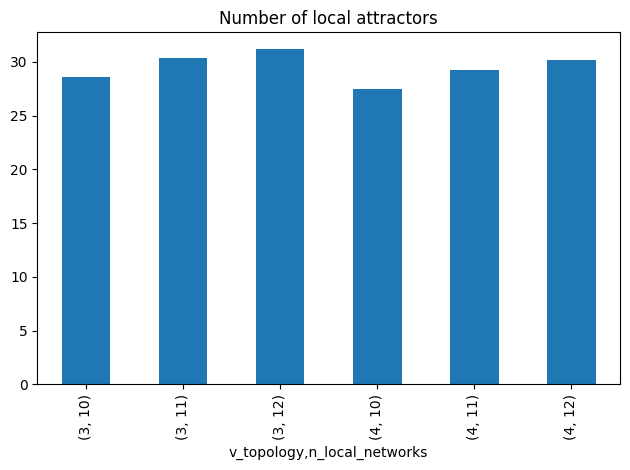

In [93]:
# group by v_topology 'v_topology' and put the mean of the 'n_pair_attractors'
grouped_df = df.groupby(['v_topology', 'n_local_networks'])

# Crear el gráfico de barras
grouped_df['n_local_attractors'].mean().plot(kind='bar')

# Mostrar el gráfico
plt.title("Number of local attractors")
plt.tight_layout()
plt.show()

### Group by Topology and number of local Networks and show the mean of the number of attractor pairs

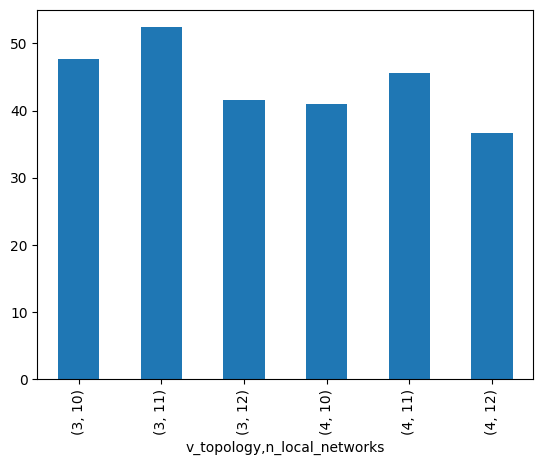

In [85]:
# group by v_topology 'v_topology' and put the mean of the 'n_pair_attractors'
grouped_df = df.groupby(['v_topology', 'n_local_networks'])

# Crear el gráfico de barras
grouped_df['n_pair_attractors'].mean().plot(kind='bar')

# Mostrar el gráfico
plt.show()

### Group by Topology and number of local Networks and show the mean of the number of attractor fields

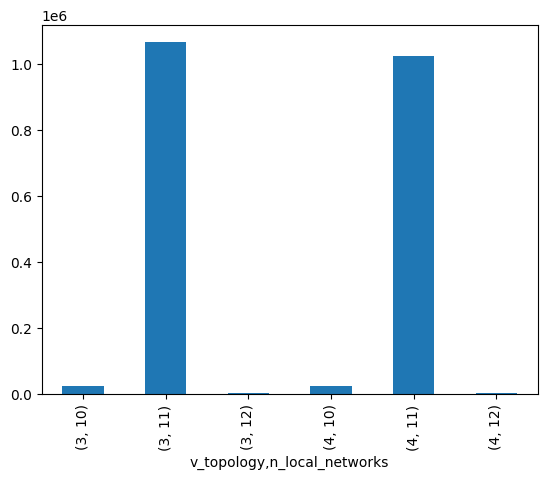

In [86]:
# group by v_topology 'v_topology' and put the mean of the 'n_pair_attractors'
grouped_df = df.groupby(['v_topology', 'n_local_networks'])

# Crear el gráfico de barras
grouped_df['n_attractor_fields'].mean().plot(kind='bar')

# Mostrar el gráfico
plt.show()

## Analysis of the data by Number of local networks

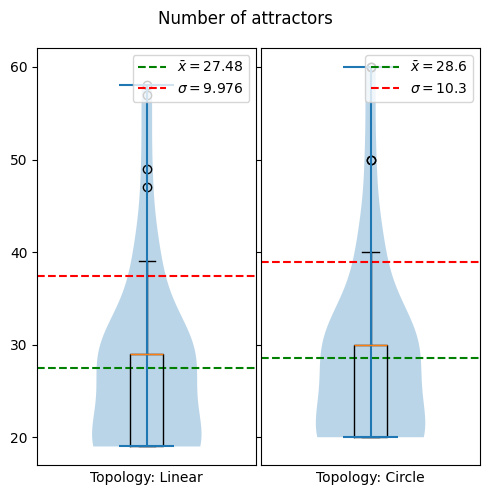

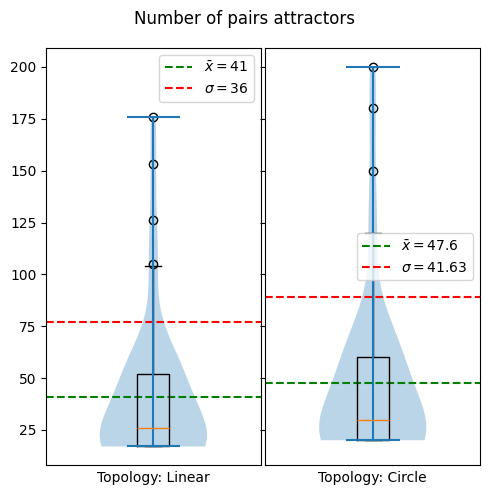

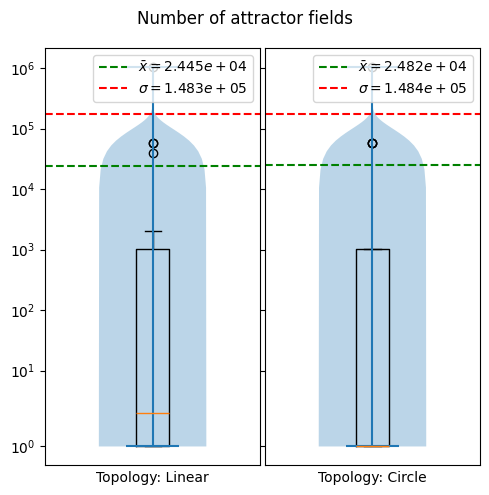

In [87]:
# Filter the graphs
df_local_networks_n = df[df['n_local_networks'] == 10]
# df_local_networks_n = df[df['n_local_networks'] == 4]
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()
# df_local_networks_n[df_local_networks_n['v_topology'] == 3].describe()

# Violin graphs
l_topologies = df_local_networks_n['v_topology'].unique()
labels_topologies = {4: "Linear", 3: "Circle"}
grouped = df_local_networks_n.groupby("n_local_networks")

labels = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [
    "Number of attractors",
    "Number of pairs attractors",
    "Number of attractor fields"])}
log_scale = {key: label for key, label in zip(df_local_networks_n.keys()[-6:-3], [False, False, True])}
grouped = df_local_networks_n.groupby("v_topology")

for key in df_local_networks_n.keys()[-6:-3]:
    fig, axs = plt.subplots(1, l_topologies.size, sharey=True, figsize=(5, 5))
    for ax, i_topology in zip(axs, l_topologies):
        group = grouped.get_group(i_topology)
        data = group[key]
        mean = ax.axhline(y=data.mean(), xmin=0.0, xmax=1.0, color='g', ls='--',
                          label=fr'$\bar{{x}}={data.mean():.4g}$')
        std_max = ax.axhline(y=data.mean() + data.std(), xmin=0.0, xmax=1.0, color='r', ls='--',
                             label=fr'$\sigma={data.std():.4g}$')
        ax.legend()
        if log_scale[key]:
            ax.set_yscale('symlog')
        ax.boxplot(data)
        ax.violinplot(data)
        ax.set_xlabel(f'Topology: {labels_topologies[i_topology]}')
        ax.set_xticks([])
        ax.set_xlim((0.5, 1.5))
    fig.suptitle(labels[key])
    fig.tight_layout(w_pad=0)


### Linear - Circle Analysis: Top 20 

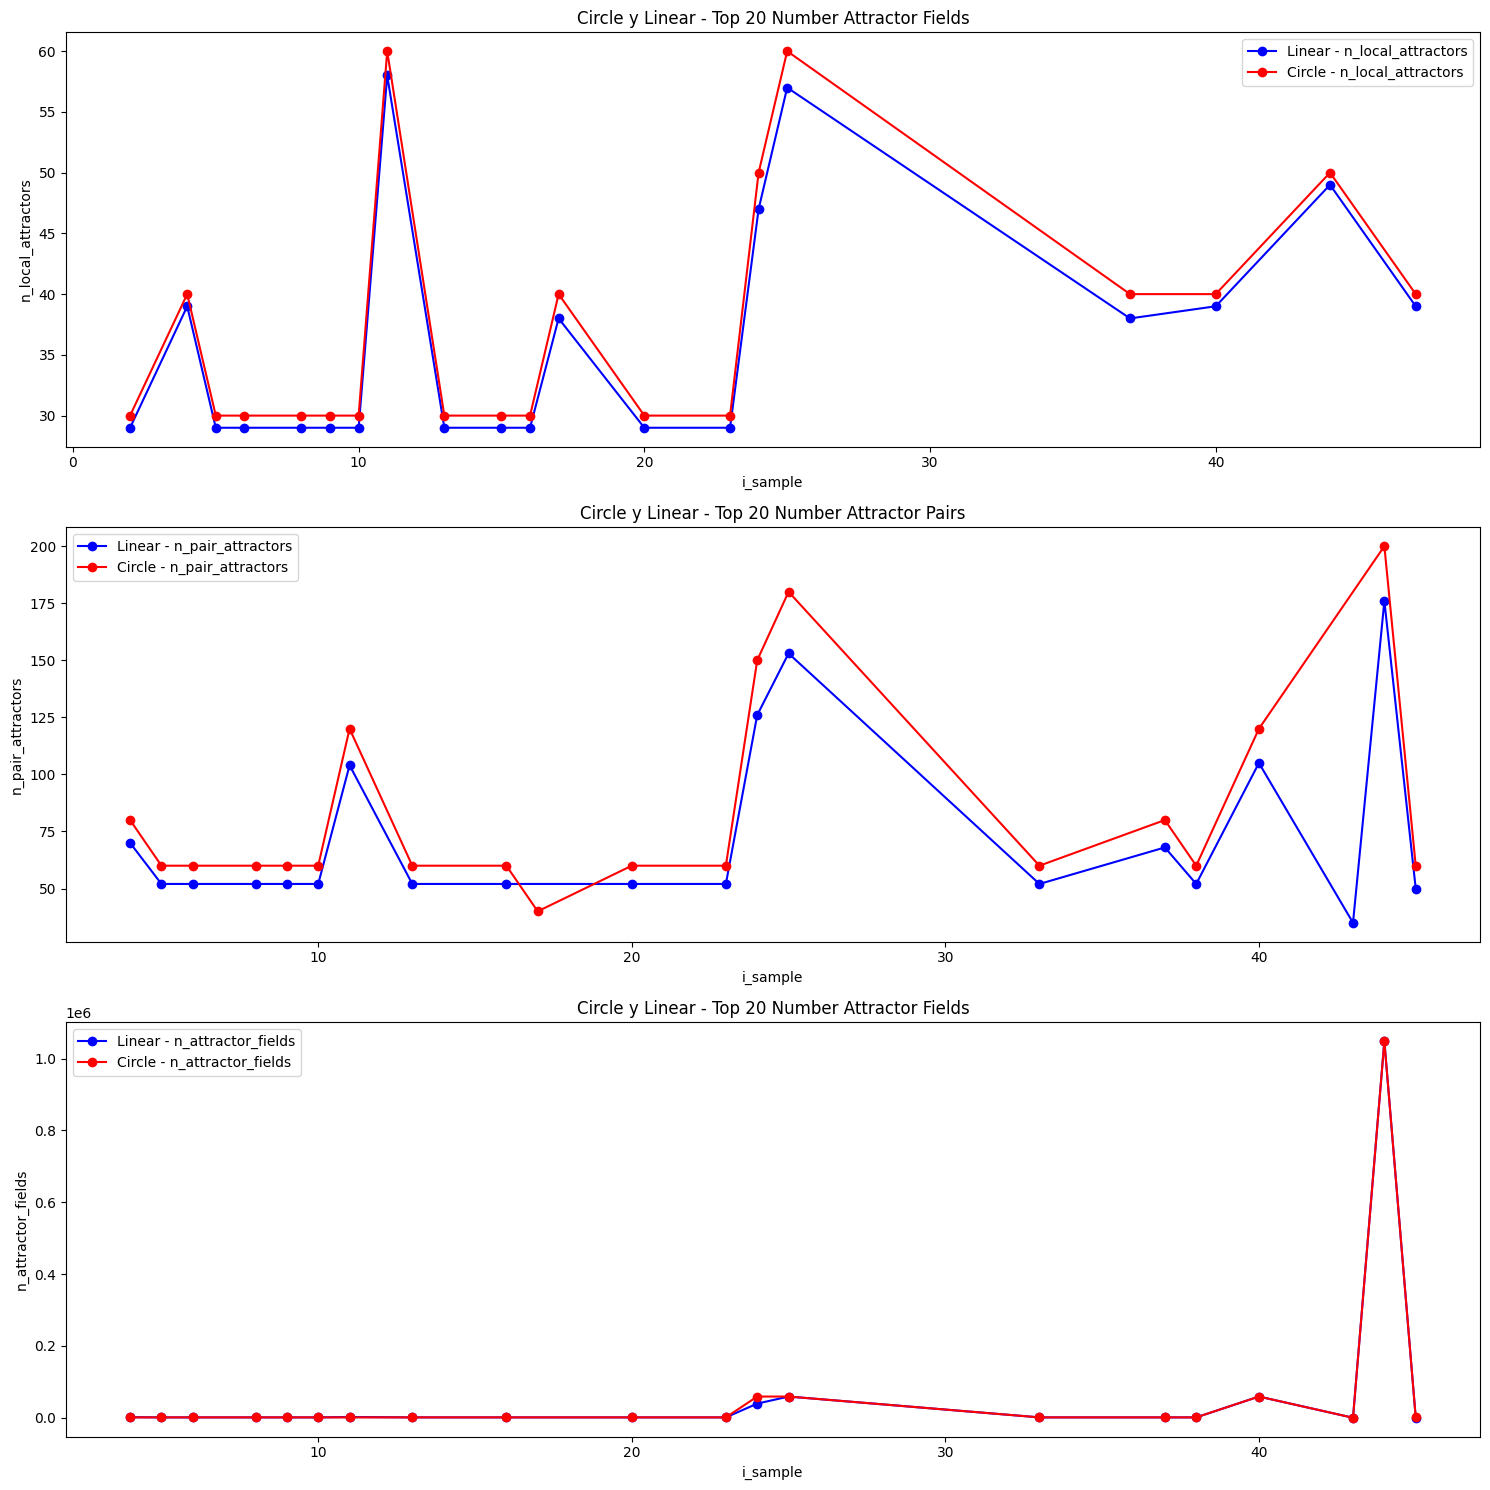

In [88]:
# Filtrar por v_topology
df_v4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4]
df_v3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3]

# Seleccionar los 20 mejores valores de df_v4 y df_v3 para cada métrica
top_20_v4_attractors = df_v4.nlargest(20, 'n_local_attractors')
top_20_v3_attractors = df_v3.nlargest(20, 'n_local_attractors')

top_20_v4_pairs = df_v4.nlargest(20, 'n_pair_attractors')
top_20_v3_pairs = df_v3.nlargest(20, 'n_pair_attractors')

top_20_v4_fields = df_v4.nlargest(20, 'n_attractor_fields')
top_20_v3_fields = df_v3.nlargest(20, 'n_attractor_fields')

# Ordenar los DataFrames por 'i_sample'
top_20_v4_attractors = top_20_v4_attractors.sort_values('i_sample')
top_20_v3_attractors = top_20_v3_attractors.sort_values('i_sample')

top_20_v4_pairs = top_20_v4_pairs.sort_values('i_sample')
top_20_v3_pairs = top_20_v3_pairs.sort_values('i_sample')

top_20_v4_fields = top_20_v4_fields.sort_values('i_sample')
top_20_v3_fields = top_20_v3_fields.sort_values('i_sample')

# Crear gráfico combinado de línea para 'n_local_attractors', 'n_pair_attractors' y 'n_attractor_fields'
plt.figure(figsize=(15, 15))

# Gráfico para 'n_local_attractors'
plt.subplot(3, 1, 1)
plt.plot(top_20_v4_attractors['i_sample'], top_20_v4_attractors['n_local_attractors'], 'o-', color='blue', label='Linear - n_local_attractors')
plt.plot(top_20_v3_attractors['i_sample'], top_20_v3_attractors['n_local_attractors'], 'o-', color='red', label='Circle - n_local_attractors')
plt.title('Circle y Linear - Top 20 Number Attractor Fields')
plt.xlabel('i_sample')
plt.ylabel('n_local_attractors')
plt.legend()

# Gráfico para 'n_pair_attractors'
plt.subplot(3, 1, 2)
plt.plot(top_20_v4_pairs['i_sample'], top_20_v4_pairs['n_pair_attractors'], 'o-', color='blue', label='Linear - n_pair_attractors')
plt.plot(top_20_v3_pairs['i_sample'], top_20_v3_pairs['n_pair_attractors'], 'o-', color='red', label='Circle - n_pair_attractors')
plt.title('Circle y Linear - Top 20 Number Attractor Pairs')
plt.xlabel('i_sample')
plt.ylabel('n_pair_attractors')
plt.legend()

# Gráfico para 'n_attractor_fields'
plt.subplot(3, 1, 3)
plt.plot(top_20_v4_fields['i_sample'], top_20_v4_fields['n_attractor_fields'], 'o-', color='blue', label='Linear - n_attractor_fields')
plt.plot(top_20_v3_fields['i_sample'], top_20_v3_fields['n_attractor_fields'], 'o-', color='red', label='Circle - n_attractor_fields')
plt.title('Circle y Linear - Top 20 Number Attractor Fields')
plt.xlabel('i_sample')
plt.ylabel('n_attractor_fields')
plt.legend()

plt.tight_layout()
plt.show()


In [89]:
# Filtrar el DataFrame para v_topology=3 y v_topology=4
df_topology_4 = df_local_networks_n[df_local_networks_n['v_topology'] == 4].set_index(['n_local_networks', 'i_sample'])
df_topology_3 = df_local_networks_n[df_local_networks_n['v_topology'] == 3].set_index(['n_local_networks', 'i_sample'])

# Realizar la resta y crear una nueva columna
df_resume = pd.DataFrame({
    'i_index': df_topology_3.index,
    'circle_local_attractors' : df_topology_3['n_local_attractors'],
    'linear_local_attractors' : df_topology_4['n_local_attractors'],
    'circle_attractors_pairs' : df_topology_3['n_pair_attractors'],
    'linear_attractors_pairs' : df_topology_4['n_pair_attractors'],
    'circle_attractors_fields' : df_topology_3['n_attractor_fields'],
    'linear_attractors_fields' : df_topology_4['n_attractor_fields']
    })
df_resume = df_resume.replace([np.inf, -np.inf], np.nan).dropna()
df_resume.describe()

,circle_local_attractors,linear_local_attractors,circle_attractors_pairs,linear_attractors_pairs,circle_attractors_fields,linear_attractors_fields
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,28.600000,27.480000,47.600000,41.000000,2.482230e+04,2.444948e+04
std,10.303556,9.975971,41.628091,35.995465,1.484052e+05,1.483353e+05
min,20.000000,19.000000,20.000000,17.000000,1.000000e+00,1.000000e+00
25%,20.000000,19.000000,20.000000,17.000000,1.000000e+00,1.000000e+00
50%,30.000000,29.000000,30.000000,26.000000,1.000000e+00,2.000000e+00
75%,30.000000,29.000000,60.000000,52.000000,1.024000e+03,1.024000e+03
max,60.000000,58.000000,200.000000,176.000000,1.048576e+06,1.048576e+06


In [90]:
df_resume[['circle_attractors_fields','linear_attractors_fields']]

circle_attractors_fields  linear_attractors_fields
n_local_networks i_sample                                                    
10               1                                1                         1
                 2                                1                         2
                 3                                1                         1
                 4                             1024                      1536
                 5                             1024                      1024
                 6                             1024                      1024
                 7                                1                         1
                 8                             1024                      1024
                 9                             1024                      1024
                 10                            1024                      1024
                 11                            1024                      2048
                 12                               1                         1
                 13                            1024                      1024
                 14                               1                         1
                 15                               1                         1
                 16                            1024                      1024
                 17                               1                         2
                 18                               1                         1
                 19                               1                         1
                 20                            1024                      1024
                 21                               1                         1
                 22                               1                         1
                 23                            1024                      1024
                 24                           59049                     39366
                 25                           59049                     59049
                 26                               1                         1
                 27                               1                         2
                 28                               1                         1
                 29                               1                         1
                 30                               1                         1
                 31                               1                         2
                 32                               1                         2
                 33                            1024                      1024
                 34                               1                         1
                 35                               1                         1
                 36                               1                         1
                 37                            1024                      1024
                 38                            1024                      1024
                 39                               1                         1
                 40                           59049                     59049
                 41                               1                         2
                 42                               1                         1
                 43                               2                        11
                 44                         1048576                   1048576
                 45                            1024                       512
                 46                               1                         2
                 47                               1                         3
                 48                               1                         1
                 49                               1                         1
                 50                              

In [91]:
df_resume.describe()

,circle_local_attractors,linear_local_attractors,circle_attractors_pairs,linear_attractors_pairs,circle_attractors_fields,linear_attractors_fields
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01
mean,28.600000,27.480000,47.600000,41.000000,2.482230e+04,2.444948e+04
std,10.303556,9.975971,41.628091,35.995465,1.484052e+05,1.483353e+05
min,20.000000,19.000000,20.000000,17.000000,1.000000e+00,1.000000e+00
25%,20.000000,19.000000,20.000000,17.000000,1.000000e+00,1.000000e+00
50%,30.000000,29.000000,30.000000,26.000000,1.000000e+00,2.000000e+00
75%,30.000000,29.000000,60.000000,52.000000,1.024000e+03,1.024000e+03
max,60.000000,58.000000,200.000000,176.000000,1.048576e+06,1.048576e+06
